In [199]:
import torch
import torch.nn as nn

In [200]:
# Example vocabulary (replace with your actual vocabulary)
vocab = {
    "apple": 0,
    "banana": 1,
    "cherry": 2,
    "date": 3,
    "elderberry": 4,
    "fig": 5,
}
word_list = list(vocab.keys())

# Example input indices (representing words from the vocabulary)
input_indices = torch.tensor([vocab["apple"], vocab["banana"], vocab["cherry"], vocab["date"], vocab["elderberry"], vocab["fig"]])
print(input_indices)

tensor([0, 1, 2, 3, 4, 5])


In [201]:
# Embedding parameters
vocab_size = len(vocab)
embedding_dim = 2  # Dimensionality of the embeddings

# Create the embedding layer
embedding_layer = nn.Embedding(vocab_size, embedding_dim)

# Apply the embedding layer to the input indices
embeddings = embedding_layer(input_indices)

# Print the embeddings
print("Input Indices:", input_indices)
print("Embeddings:", embeddings)

Input Indices: tensor([0, 1, 2, 3, 4, 5])
Embeddings: tensor([[-0.9159, -1.0467],
        [-0.6514,  0.6770],
        [ 1.4778,  0.6756],
        [-0.4753, -0.3208],
        [-0.1215, -0.5721],
        [-0.1987,  0.0452]], grad_fn=<EmbeddingBackward0>)


In [202]:
def show_embeddings(embeddings):
    data = pd.DataFrame(embeddings, columns=["A", "B"])
    data['Word'] = word_list

    plt.figure(figsize=(4,3))
    sns.scatterplot(x='A', y='B', data=data)

    for i, row in data.iterrows():
      plt.annotate(row['Word'], (row['A'], row['B']))

    plt.title("Trained 2D Embeddings Visualization")
    plt.show()

In [203]:
before = embedding_layer(input_indices).detach().numpy()

In [204]:
# Example of obtaining embedding for a single word:
single_word_embedding = embedding_layer(torch.tensor(vocab["date"]))
print("Embedding for 'date':", single_word_embedding)

Embedding for 'date': tensor([-0.4753, -0.3208], grad_fn=<EmbeddingBackward0>)


In [205]:
# Example of how to access the embedding weights directly:
embedding_weights = embedding_layer.weight
print("Embedding Weights:", embedding_weights)

Embedding Weights: Parameter containing:
tensor([[-0.9159, -1.0467],
        [-0.6514,  0.6770],
        [ 1.4778,  0.6756],
        [-0.4753, -0.3208],
        [-0.1215, -0.5721],
        [-0.1987,  0.0452]], requires_grad=True)


In [206]:
# Access the embedding for the word at index 0 (apple):
apple_embedding = embedding_weights[0]
print("Embedding for apple from weights:", apple_embedding)

Embedding for apple from weights: tensor([-0.9159, -1.0467], grad_fn=<SelectBackward0>)


In [207]:
# Example of how to train the embedding layer.
# In a real-world scenario, you would train this as part of a larger neural network.
# Here's a simplified example to show how the weights change.
optimizer = torch.optim.SGD(embedding_layer.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

target = torch.randn(len(input_indices), embedding_dim) # dummy target for the example.

for epoch in range(100):
  optimizer.zero_grad()
  embedded = embedding_layer(input_indices)
  loss = loss_fn(embedded, target)
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch+1}, Loss: {loss.item()}") if epoch % 10 == 0 else None

print("Embeddings after training:", embedding_layer(input_indices))

Epoch 1, Loss: 1.9184099435806274
Epoch 11, Loss: 1.3707448244094849
Epoch 21, Loss: 0.9794264435768127
Epoch 31, Loss: 0.6998210549354553
Epoch 41, Loss: 0.5000371932983398
Epoch 51, Loss: 0.35728719830513
Epoch 61, Loss: 0.25528934597969055
Epoch 71, Loss: 0.18240968883037567
Epoch 81, Loss: 0.13033562898635864
Epoch 91, Loss: 0.09312758594751358
Embeddings after training: tensor([[ 0.8892,  0.3577],
        [ 0.2232,  2.1052],
        [ 1.1910, -1.1439],
        [-1.4171,  0.2729],
        [ 0.4972, -0.8975],
        [-0.9426, -1.1938]], grad_fn=<EmbeddingBackward0>)


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

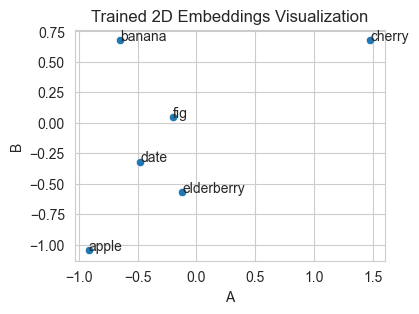

In [209]:
show_embeddings(before)

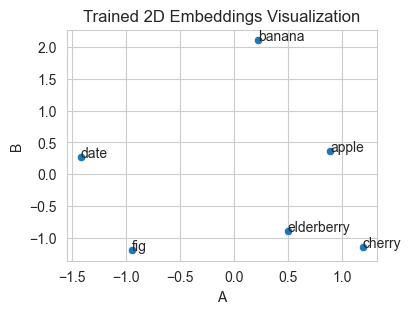

In [210]:
after = embedding_layer(input_indices).detach().numpy()
show_embeddings(after)